# Processor to crop and register multiplane data
* input:
  *  path: path to 3D or 4D stack in tiff format
  *  calpath: path to calibration file
  *    
* output:
  *  4D stack, order
  *  calibration file
  *  processing log file


In [1]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class
proc = MultiplaneProcess()

In [2]:
# choose path via gui or direcit input  
proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2')

'C:\\Users\\mengelhardt\\data\\local\\KINETIX_4speck_642_2'

In [3]:
# get metadata if present
proc.get_files_with_metadata()
proc.get_metadata()

{'KINETIX_4speck_642_2_MMStack_Pos0': {'Prefix': '"KINETIX_4speck_642_2"',
  'UserName': '"LocalAdmin"',
  'ProfileName': '"Default User"',
  'MicroManagerVersion': '"2.0.1 20230712"',
  'ComputerName': '"TUD1003108"',
  'Directory': '"D:\\\\moritz\\\\PSFs\\\\20240214"',
  'ChannelGroup': '""',
  'z-step_um': '0.009999999999999787',
  'Interval_ms': '0.0',
  'CustomIntervals_ms': '[]',
  'TimeFirst': 'true',
  'SlicesFirst': 'true',
  'time': '1',
  'position': '1',
  'z': '601',
  'Frames': '1',
  'Positions': '1',
  'Slices': '601',
  'Channels': '2',
  'StartTime': '"2024-02-14 16:22:12.466 +0100"',
  'KeepShutterOpenSlices': 'true',
  'KeepShutterOpenChannels': 'false',
  'PixelType': '"GRAY16"',
  'Width': '0',
  'Height': '0',
  'type': '"STRING"'}}

In [4]:
# activate logging
proc.set_logging(True)
#proc.load_calibration()
proc.cal

{}

Read image KINETIX_4speck_642_2_MMStack_Pos0.ome.tif; size (601, 2, 850, 1055); type uint16
Determine skew angle...


100%|██████████| 31/31 [00:29<00:00,  1.07it/s]


Best Angle: -0.19999999999999973 degrees
Max Line Count: 702.0


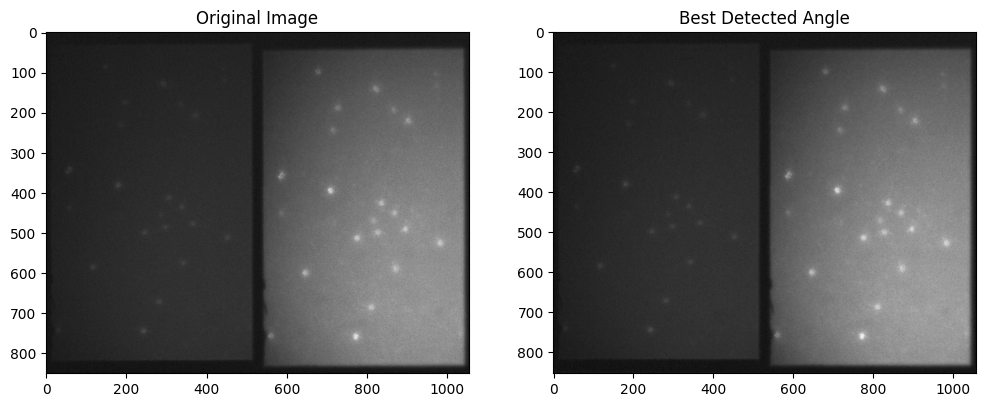

Rotating by skew angle...
Adaptive thresholding cam 0..


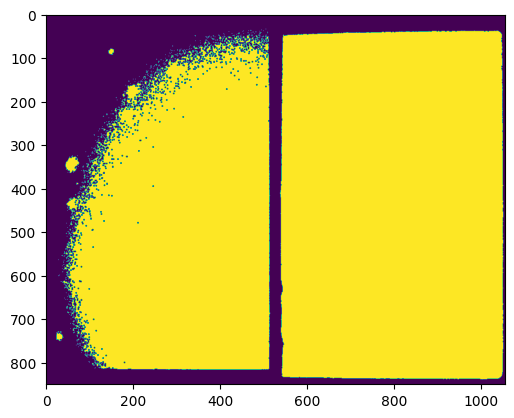

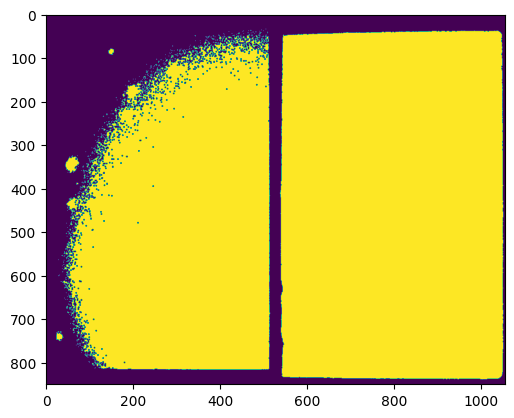

Determine skew angle...


100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


Best Angle: 0.40000000000000036 degrees
Max Line Count: 678.0


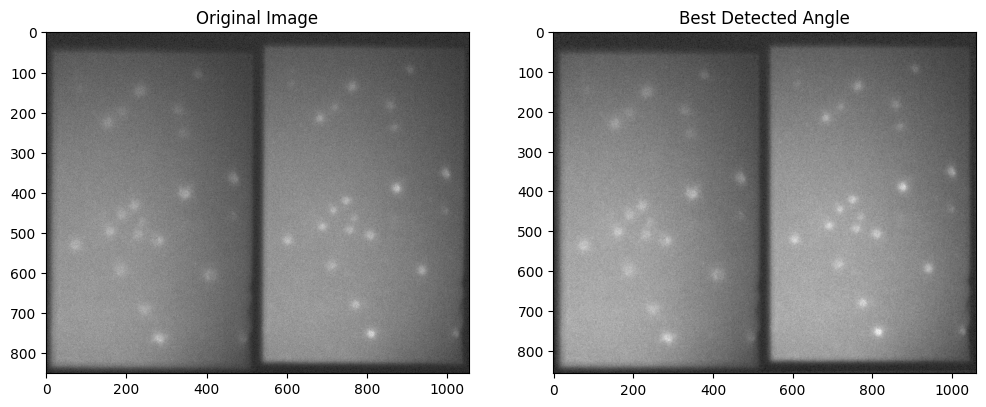

Rotating by skew angle...
Adaptive thresholding cam 1..


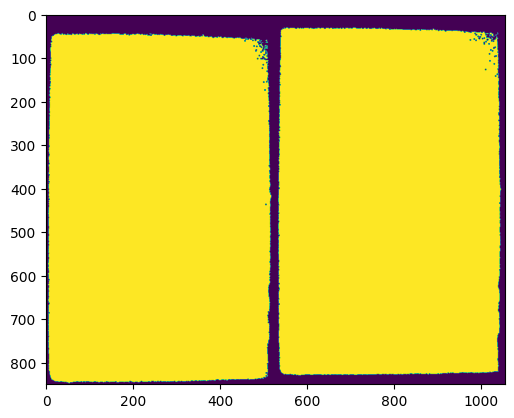

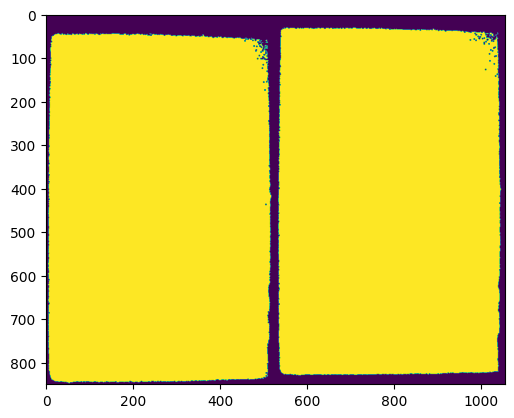

FOV size consolidation: 100%|██████████| 2/2 [00:23<00:00, 11.99s/it]


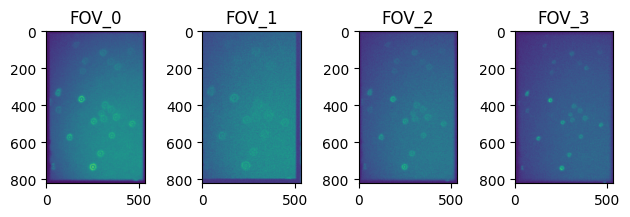

Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 1/4 [00:02<00:06,  2.30s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 2/4 [00:04<00:04,  2.10s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 3/4 [00:06<00:02,  2.13s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 24.16it/s]


Determining relative z-distances and order
Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\interplane_distance.svg
Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\interplane_distance.png

Using order [3 2 0 1]
Registration of data...


Image plane: 100%|██████████| 3/3 [05:39<00:00, 113.16s/it]


{'fovs': {0: {0: [28, 522, 850, 1055], 1: [20, 10, 842, 543]},
  1: {0: [19, 522, 841, 1055], 1: [28, 0, 850, 533]}},
 'deg': {0: -0.19999999999999973, 1: 0.40000000000000036},
 'dz': [66.27899318909238, 37.14516721045251, 71.70758676816149],
 'order': array([3, 2, 0, 1], dtype=int64),
 'brightness': {0: 0.8147078959978126,
  1: 1.2977294918561255,
  2: 0.9462318524018785,
  3: 0.9413307597441835},
 'transform': array([[ 0.08002, -0.21026],
        [-0.2002 , -1.42896],
        [ 0.55804, -0.79764]])}

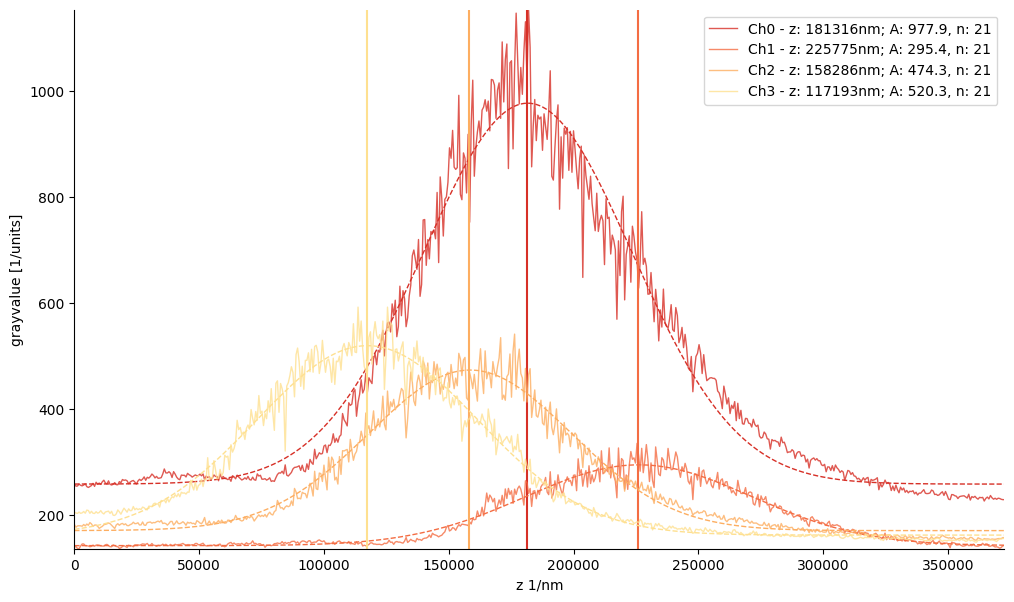

In [5]:
proc.calibrate(is_bead = True)

In [ ]:
proc.check_calibration()

In [ ]:
proc.execute()

In [1]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class
proc = MultiplaneProcess()
proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data')
proc.get_files_with_metadata()
# activate logging
proc.set_logging(True)
stack = proc.load_data()
#stack = stack[:,50:-50:8,:,:]
#stack = stack[:,250:305,:,:]

stack.shape


(4, 601, 822, 533)

Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 1/4 [00:02<00:06,  2.16s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 2/4 [00:04<00:04,  2.42s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 3/4 [00:07<00:02,  2.47s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [00:09<00:00,  2.55s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


Tracking beads in z: 100%|██████████| 4/4 [01:02<00:00, 15.58s/it]


Determining relative z-distances and order


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]


Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\cal_data\interplane_distance.svg
Finished writing C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\cal_data\interplane_distance.png


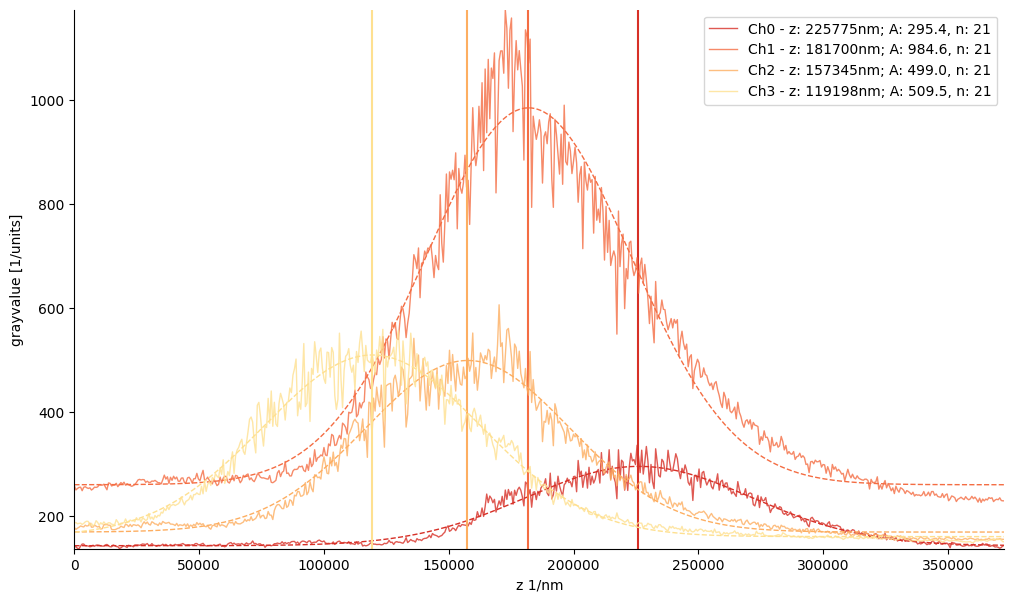

In [2]:
tracks = proc.estimate_interplane_distance(stack)

In [6]:
proc.cal

{}

In [1]:
import skimage as skim
from multiplane_calibration import MultiplaneCalibration
# Initialize the MultiplaneProcess class
calib = MultiplaneCalibration()
fname = r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data\KINETIX_4speck_642_2_MMStack_Pos0.ome.tif'
stack = skim.io.imread(fname)
stack = stack[:,50:-50:8,:,:]


Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 1/4 [00:01<00:03,  1.08s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 2/4 [00:02<00:02,  1.10s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 3/4 [00:03<00:01,  1.05s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

Skipped 0 / 12621 (0.00%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 42.04it/s]

Determining relative z-distances and order


{'dz': [61.52598112462792, 39.28272351936528, 71.08850292334472],
 'labels': ['1-0', '2-1', '3-2']}

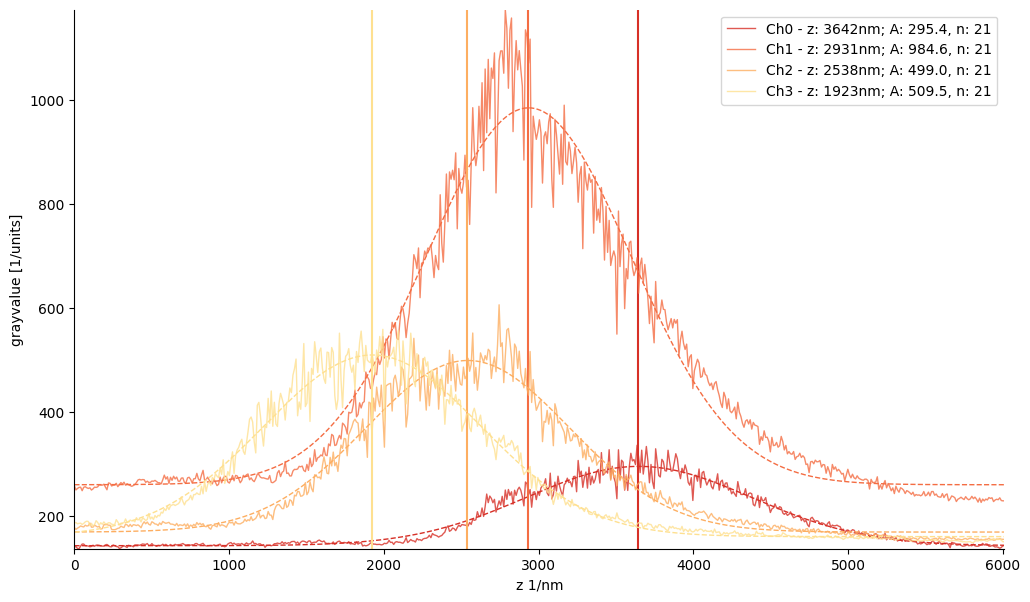

In [2]:
calib.estimate_interplane_distance(stack)

In [3]:
calib.get_transformation(stack)

Calculating transform:  75%|███████▌  | 3/4 [00:00<00:00, 748.98it/s]


In [7]:
calib.transform

{1: array([[ 9.10012454e-01, -5.99709822e-02,  4.59466675e+01],
        [ 1.25630704e-02,  1.00871331e+00,  1.22052523e+01]]),
 2: array([[ 9.46733874e-01, -3.53047362e-02,  3.05668805e+01],
        [ 1.96322300e-02,  1.01243953e+00,  1.05038619e+00]]),
 3: array([[ 9.73534575e-01, -3.16049444e-02,  2.55274791e+01],
        [-8.84870476e-02,  9.24532871e-01,  5.31745200e+01]])}

Estimating interplane distance..


SR-localising peaks:  50%|█████     | 2/4 [00:00<00:00,  6.86it/s]

Skipped 0 / 1386 (0.00%) peaks in fitting due to irregular shape.
Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

Skipped 0 / 1323 (0.00%) peaks in fitting due to irregular shape.
Skipped 63 / 1323 (4.76%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 48.77it/s]


Determining relative z-distances and order


Slice: 100%|██████████| 63/63 [00:08<00:00,  7.54it/s]


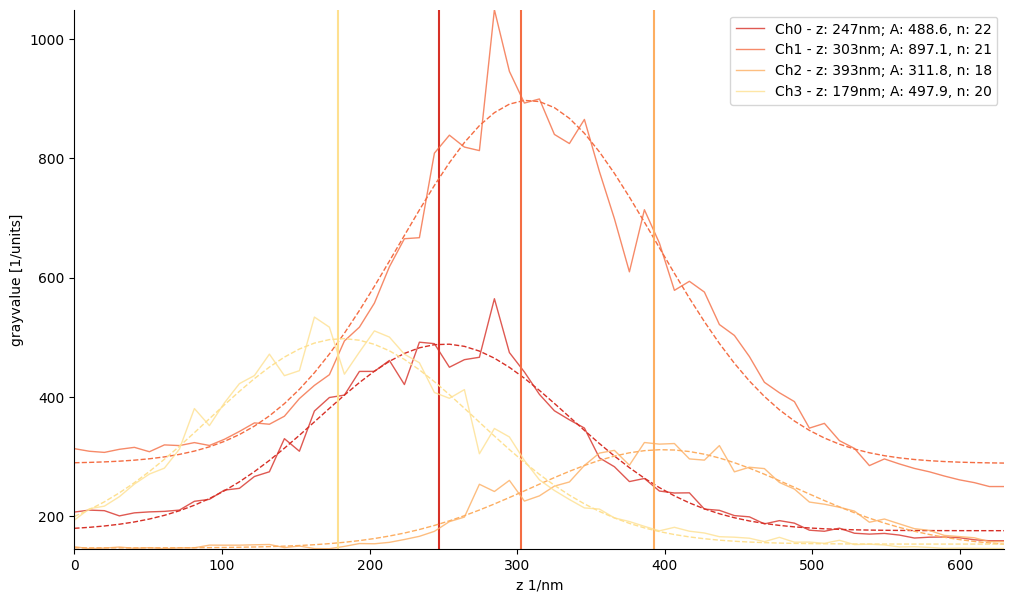

In [2]:
stack.shape
stack_test = stack.copy()
stack_test[0,...] = stack[2,...] 
stack_test[2,...] = stack[0,...]  
calib.estimate_interplane_distance(stack_test)
calib.get_transformation(stack_test)
stack_out = calib.apply_transformation(stack_test)

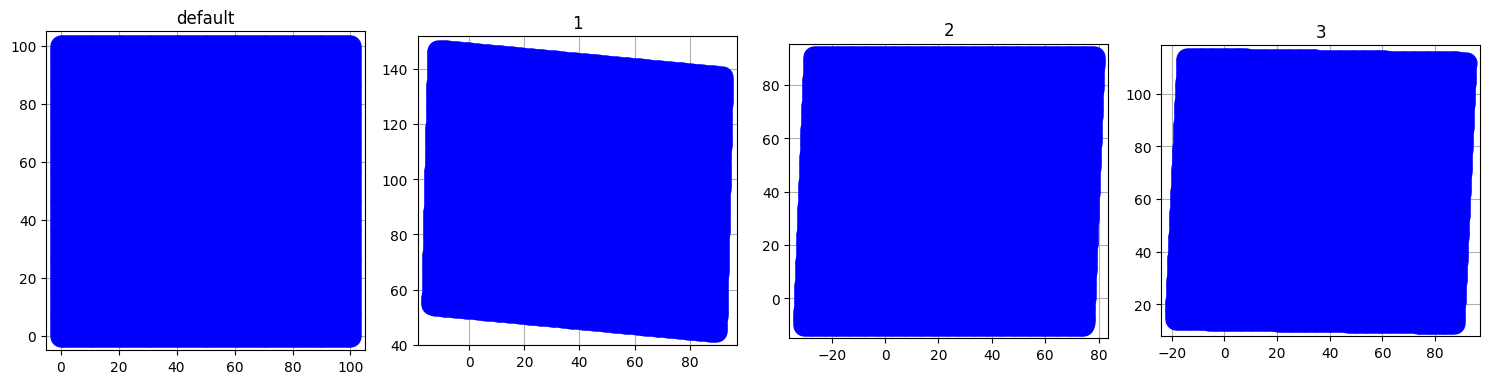

In [3]:
calib.display_transformations()

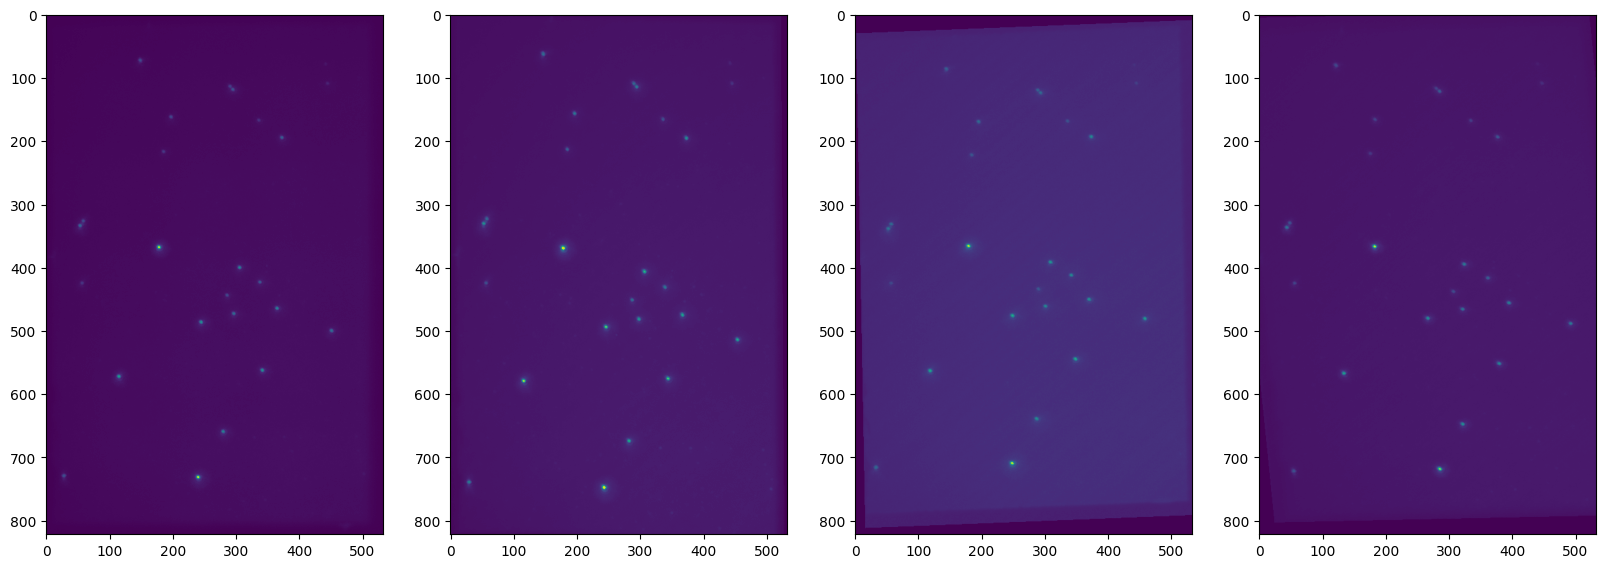

In [14]:
import matplotlib.pyplot as plt
import numpy as np
s = 2
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,15))
ax1.imshow(np.max(stack_test[0,...], axis=0))
ax2.imshow(np.max(stack_test[1,...], axis=0))
ax3.imshow(np.max(stack_test[2,...], axis=0))
ax4.imshow(np.max(stack_test[3,...], axis=0))


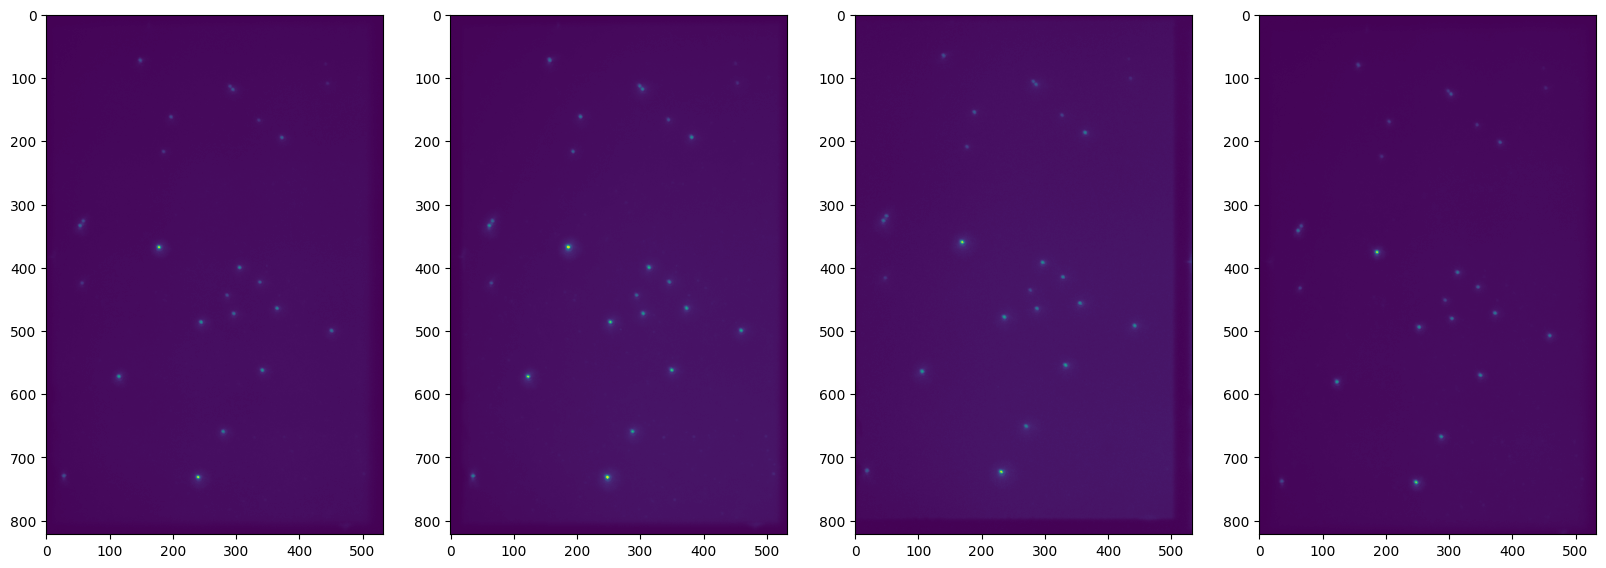

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,15))
ax1.imshow(np.max(stack[2,...], axis=0))
ax2.imshow(np.max(stack[1,...], axis=0))
ax3.imshow(np.max(stack[0,...], axis=0))
ax4.imshow(np.max(stack[3,...], axis=0))